In [1]:
import pandas as pd
import numpy as np
!pip install catboost
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 76.1 MB 1.6 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##Call the data
df = pd.read_csv('/content/drive/MyDrive/Ensemble Learning/Tweets/df_all_features_tfidf.csv', index_col=0)
print(df.head(2))
df = df.sample(frac=1,random_state=0).reset_index(drop=True)
print(df.head(2))

section = round(len(df)*8/10)
train_df = df.iloc[:section]
test_df = df.iloc[section:]

train_cols_x = list(train_df.drop(['cyberbullying_type', 'tweet_text'], axis=1).columns)
test_cols_x = list(test_df.drop(['cyberbullying_type', 'tweet_text'], axis=1).columns)

train_x = train_df[train_cols_x]
test_x = test_df[test_cols_x]

train_y = train_df['cyberbullying_type']
test_y = test_df['cyberbullying_type']
test_y = test_y.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)

train_y = np.transpose(np.array(train_y)).ravel()
test_y = np.transpose(np.array(test_y)).ravel()

     0    1    2    3    4    5    6    7    8    9  ...  muslim  gay  round  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0    0      0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0    0      0   

   good  radical  bad  mkr  rape  stupid  lot  
0     0        0    0    1     0       0    0  
1     0        0    0    1     0       0    0  

[2 rows x 1179 columns]
     0    1    2    3    4    5    6    7    8    9  ...  muslim  gay  round  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0    0      0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0    0      0   

   good  radical  bad  mkr  rape  stupid  lot  
0     0        0    0    0     0       0    0  
1     0        0    0    0     0       0    0  

[2 rows x 1179 columns]


In [ ]:
df.head()

,tweet_text,cyberbullying_type,characters per tweet,words_per_tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,@slainv_fr just because you closely associate ...,other_cyberbullying,123,20,0,19,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,"rt @playhearthstone: roses are red,",other_cyberbullying,35,5,1,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"what's happening in wb, why you idiots not wri...",religion,119,20,1,16,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,"“to every girl who bullied me in high school, ...",age,78,15,0,14,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,"even if he has parkinson’s, people on twitter ...",gender,125,22,0,19,3,0,0,5,...,0,1,0,0,0,0,0,1,0,0


In [5]:
#define dataset used to train the model
train_dataset = Pool(data=train_x,
                     label=train_y,
                     )

#define dataset used to test the model
eval_dataset = Pool(data=test_x,

                    )

#set model parameters
model = CatBoostClassifier(
    iterations=2000,
    random_strength=0.5, #reduce overfitting
    depth=6, #depth of the tree
    l2_leaf_reg=2,
    border_count=32,
    rsm = 1,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    boosting_type = 'Plain',
    verbose = 200
)


model.fit(train_dataset, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6480579	total: 665ms	remaining: 22m 9s
200:	learn: 0.8195209	total: 1m 36s	remaining: 14m 26s
400:	learn: 0.8406982	total: 3m 7s	remaining: 12m 27s
600:	learn: 0.8498192	total: 4m 39s	remaining: 10m 51s
800:	learn: 0.8554018	total: 6m 11s	remaining: 9m 16s
1000:	learn: 0.8597002	total: 7m 55s	remaining: 7m 54s
1200:	learn: 0.8628191	total: 9m 31s	remaining: 6m 20s
1400:	learn: 0.8657284	total: 11m 5s	remaining: 4m 44s
1600:	learn: 0.8685852	total: 12m 41s	remaining: 3m 9s
1800:	learn: 0.8709965	total: 14m 18s	remaining: 1m 34s
1999:	learn: 0.8734602	total: 15m 55s	remaining: 0us


In [10]:
## grid search for catboost.

param_grid = {'depth'         : [6,8,10],
              'learning_rate' : [0.01,0.02,0.04],
              'iterations'    : [1000,2000,3000],
              'l2_leaf_reg'   : [1,3,5]
              }
    
grid_search = GridSearchCV(estimator=model , param_grid = param_grid, cv = 2)
grid_search.fit(train_x, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 4770, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2081, in _fit
    callbacks=callba

TypeError: ignored

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 


NameError: ignored

In [7]:
y_pred = model.predict(test_x)
f1 = f1_score(test_y, y_pred, average='macro')
accuracy = accuracy_score(test_y, y_pred)
print("f1 score is " + str(f1))
print("accuracy is " + str(accuracy))

f1 score is 0.8500493707794886
accuracy is 0.8497588592996436


In [8]:
y_pred_train = model.predict(train_x)
f1_train = f1_score(train_y, y_pred_train, average='macro')
accuracy = accuracy_score(train_y, y_pred_train)
print("f1 score is " + str(f1))
print("accuracy is " + str(accuracy))

f1 score is 0.8500493707794886
accuracy is 0.8734601876605337


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

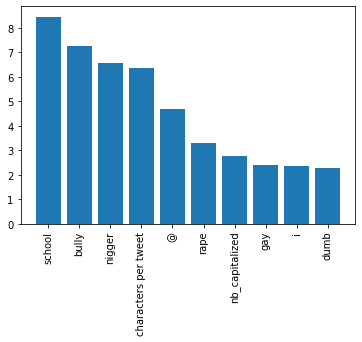

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
df_feat_imp = pd.DataFrame()
df_feat_imp['Features'] = train_cols_x
df_feat_imp['Importance'] = importances.tolist()
df_feat_imp = df_feat_imp.sort_values(by='Importance',ascending=False)[:10]
df_feat_imp.head(10)
plt.bar(df_feat_imp['Features'],df_feat_imp['Importance'],align = 'center')
plt.xticks(rotation = 90)